In [1]:
# standard data science imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# data prep imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# stats import
from scipy import stats

# modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model evaluation imports
from sklearn.metrics import \
accuracy_score,\
recall_score,\
precision_score,\
confusion_matrix,\
classification_report

# ignore warning import
import warnings
warnings.filterwarnings("ignore")

# custom modules
import os
import env
import acquire_telco as a
import prepare as p

In [2]:
df = a.get_telco_data()

this file exists, reading csv


In [3]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_support 

In [5]:
num_col = df.select_dtypes(include='number').columns
num_col

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges'],
      dtype='object')

Univariate Stats

payment_type_id


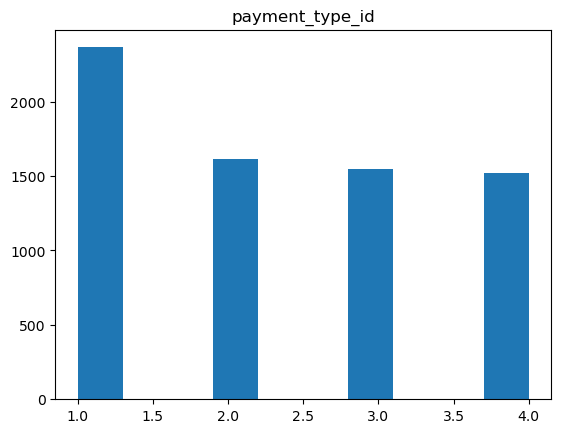

internet_service_type_id


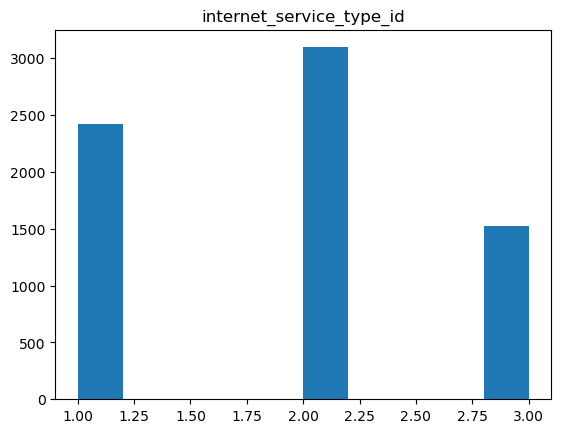

contract_type_id


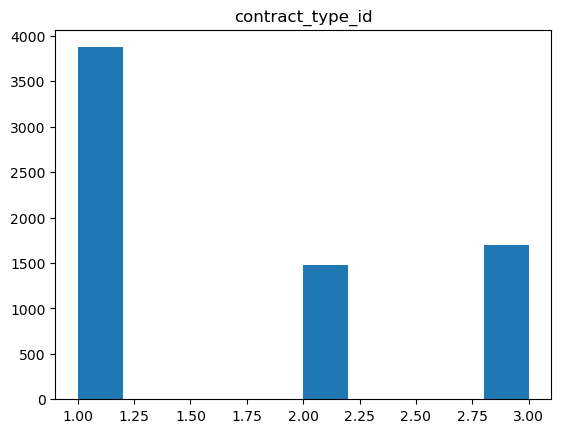

senior_citizen


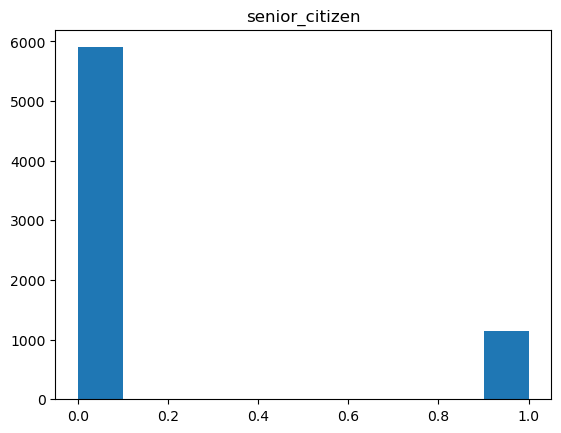

tenure


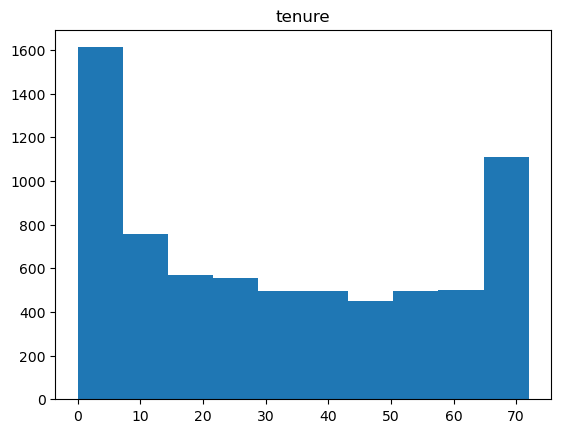

monthly_charges


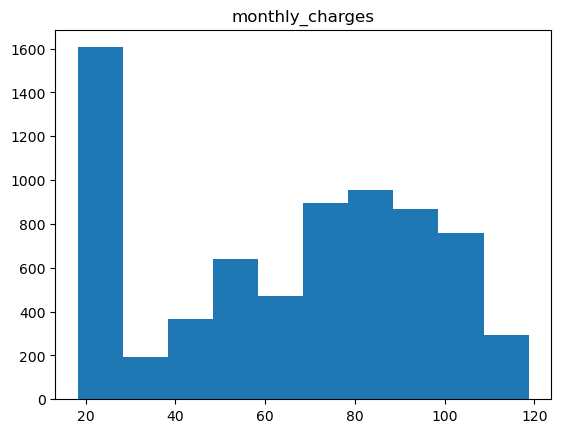

In [6]:
for col in num_col:
    print(col)
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [7]:
str_col = df.select_dtypes(exclude='number').columns
str_col

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64


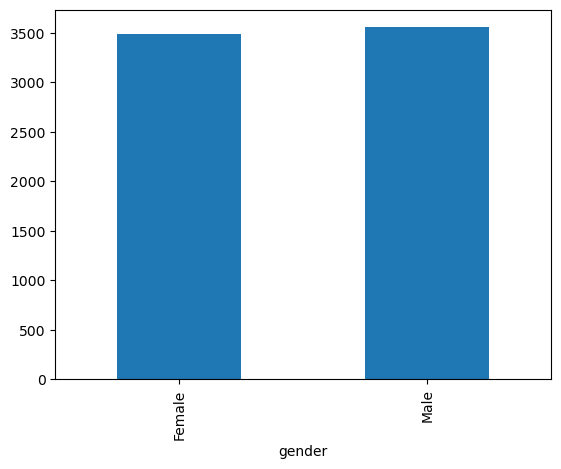


partner
partner
No     3641
Yes    3402
Name: count, dtype: int64
partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64


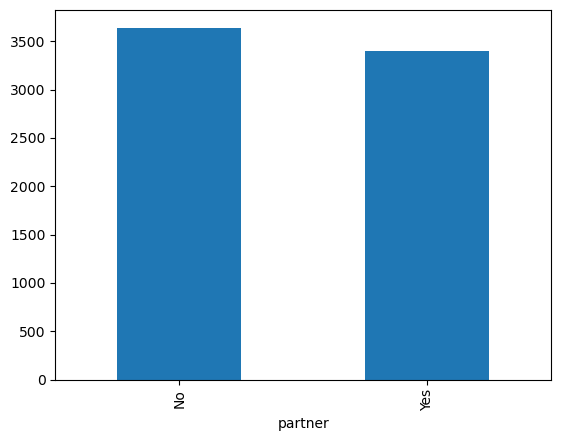


dependents
dependents
No     4933
Yes    2110
Name: count, dtype: int64
dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64


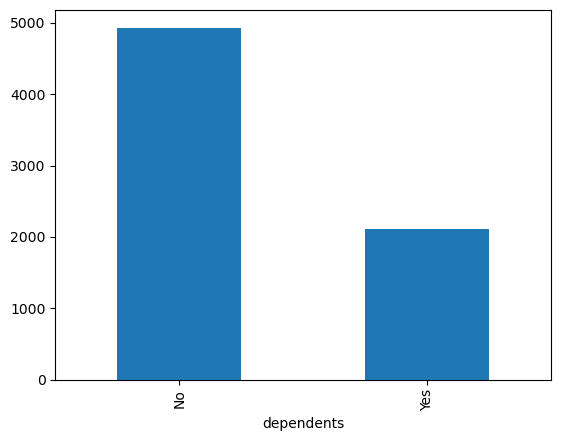


phone_service
phone_service
Yes    6361
No      682
Name: count, dtype: int64
phone_service
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64


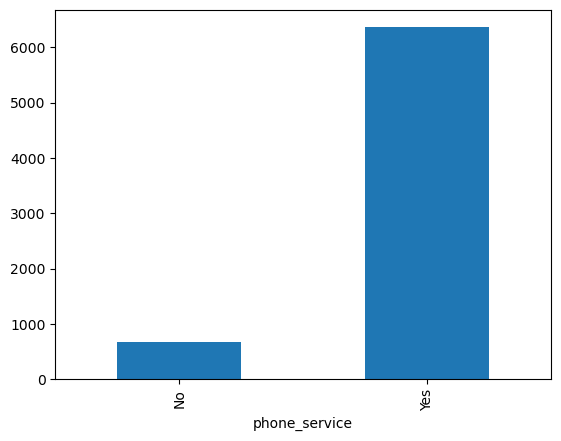


multiple_lines
multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
multiple_lines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64


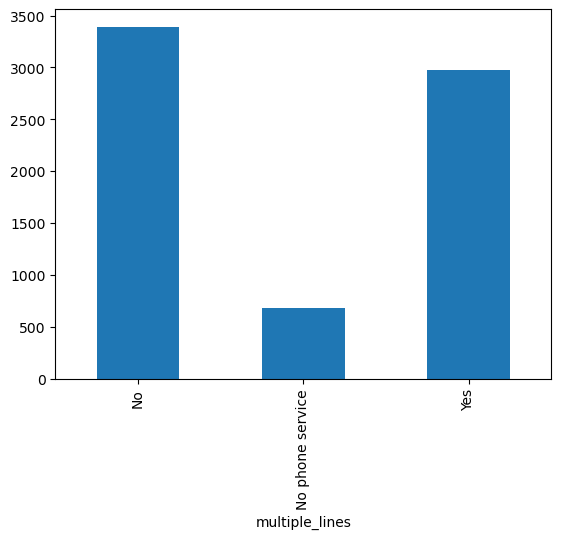


online_security
online_security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
online_security
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64


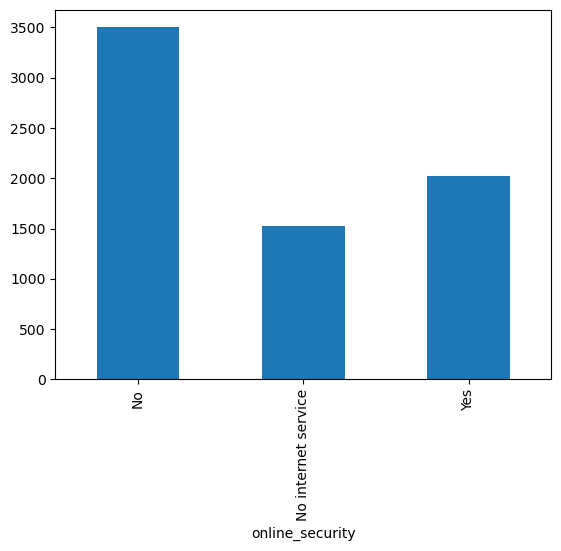


online_backup
online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
online_backup
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: proportion, dtype: float64


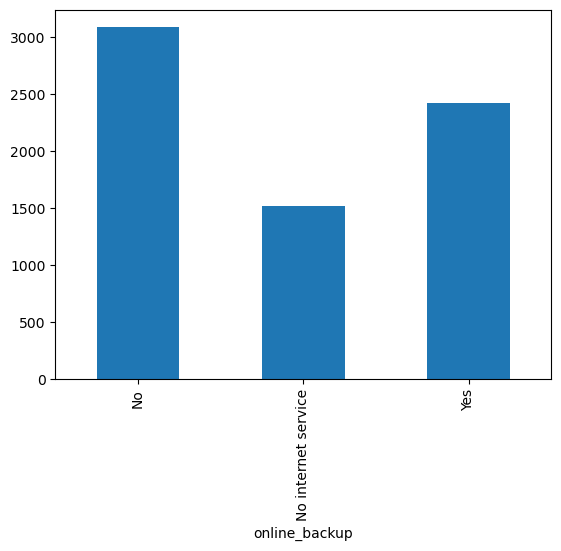


device_protection
device_protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
device_protection
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: proportion, dtype: float64


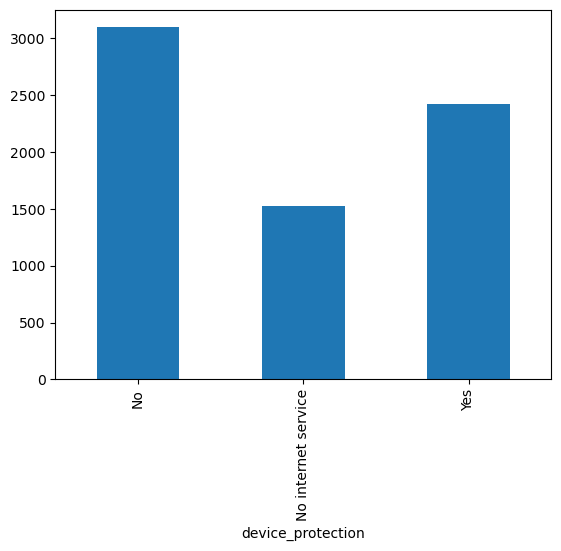


tech_support
tech_support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
tech_support
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: proportion, dtype: float64


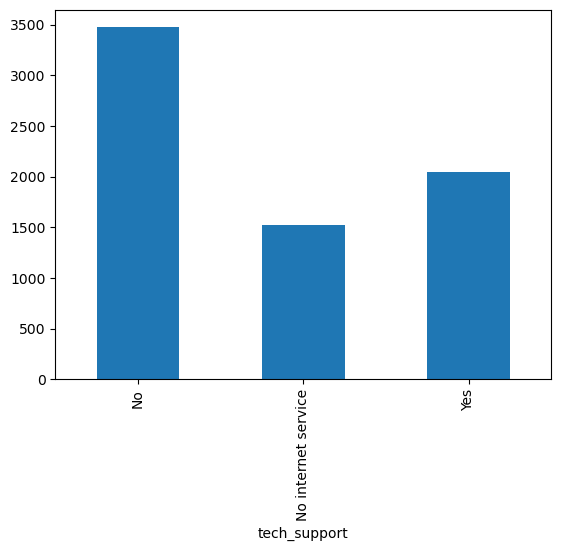


streaming_tv
streaming_tv
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
streaming_tv
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: proportion, dtype: float64


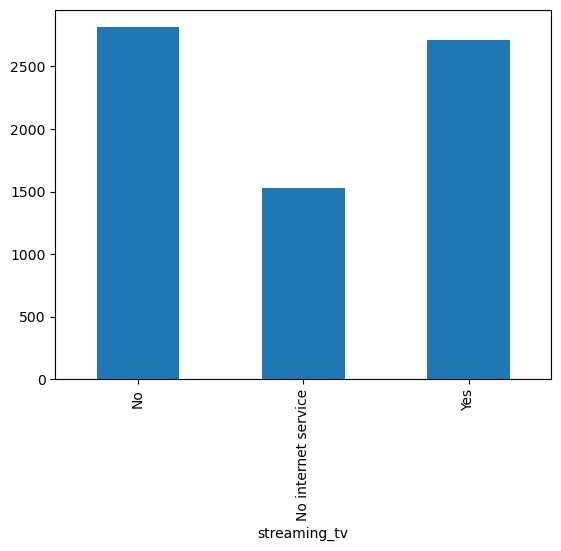


streaming_movies
streaming_movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
streaming_movies
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: proportion, dtype: float64


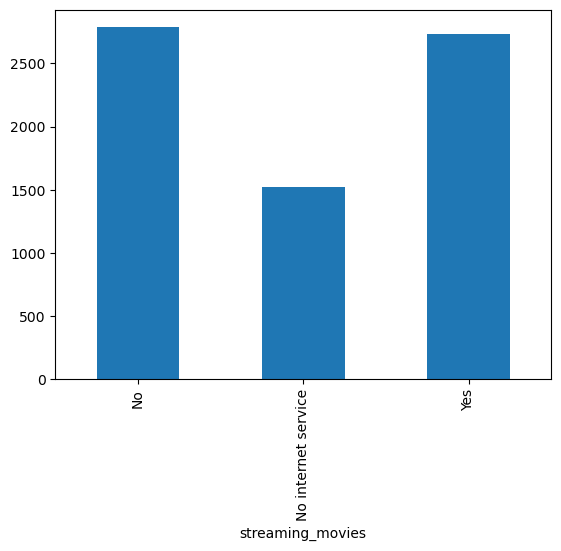


paperless_billing
paperless_billing
Yes    4171
No     2872
Name: count, dtype: int64
paperless_billing
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64


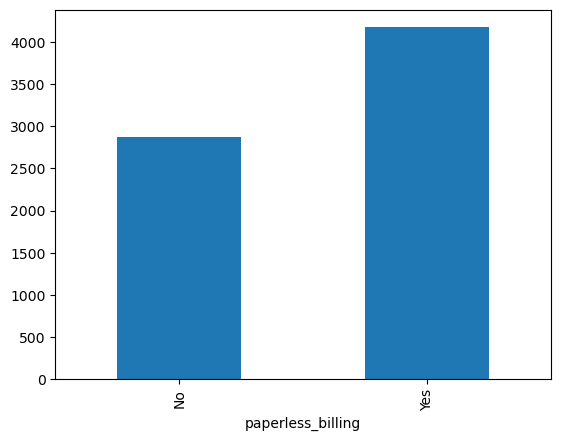


total_charges
total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64
total_charges
           0.001562
20.2       0.001562
19.75      0.001278
19.9       0.001136
20.05      0.001136
             ...   
2387.75    0.000142
6302.8     0.000142
2058.5     0.000142
829.55     0.000142
3707.6     0.000142
Name: proportion, Length: 6531, dtype: float64


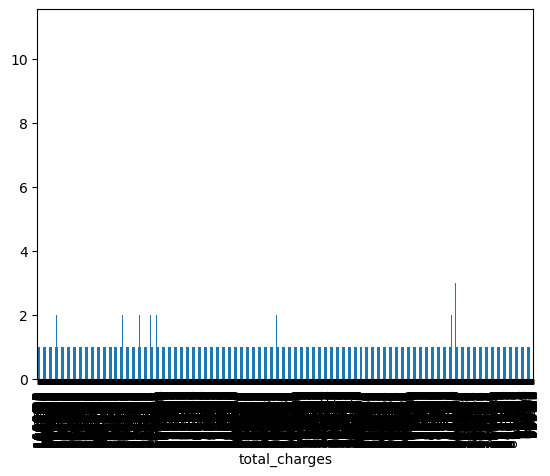


churn
churn
No     5174
Yes    1869
Name: count, dtype: int64
churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


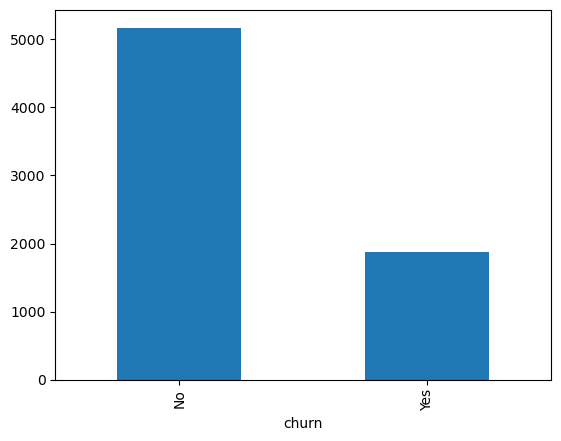


contract_type
contract_type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
contract_type
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64


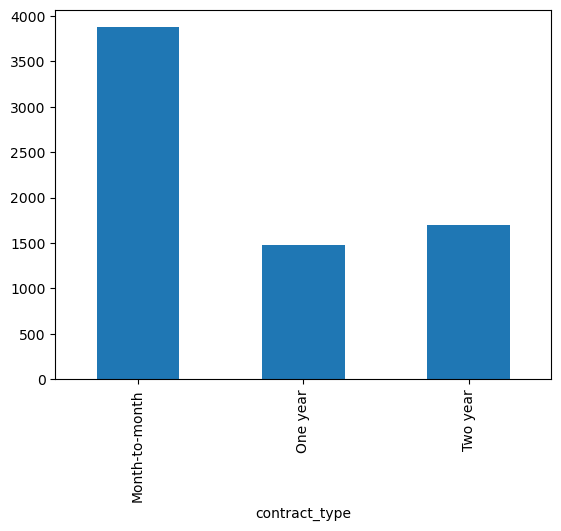


internet_service_type
internet_service_type
Fiber optic    3096
DSL            2421
Name: count, dtype: int64
internet_service_type
Fiber optic    0.561175
DSL            0.438825
Name: proportion, dtype: float64


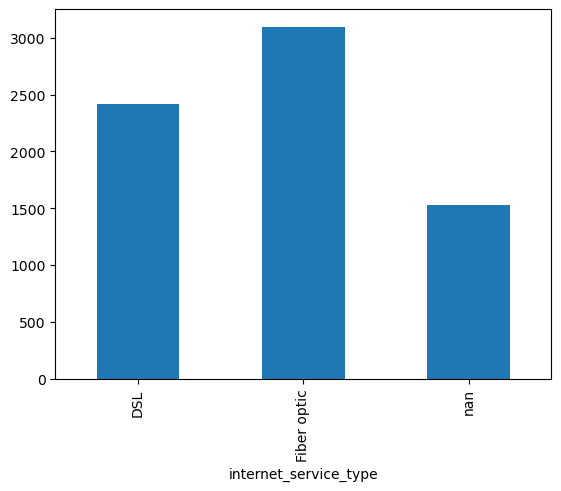


payment_type
payment_type
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
payment_type
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64


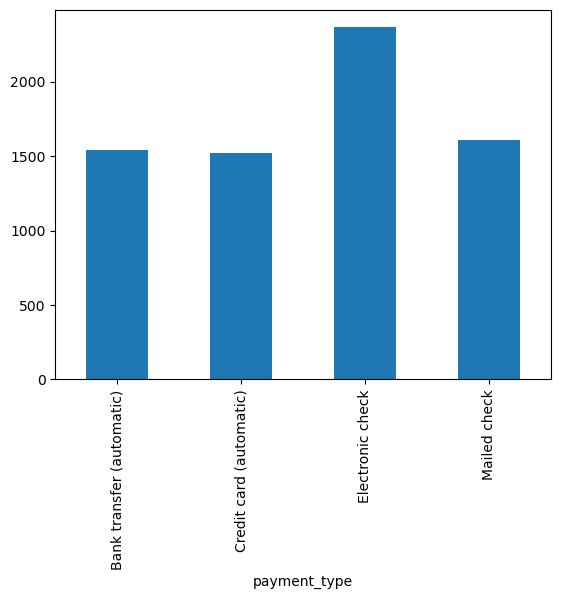

In [8]:
for col in str_col[1:]:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)) #percentage
    df[col].value_counts(dropna=False).sort_index().plot.bar()
    plt.show()
    print()

>From the given data, we can see that almost 27% of customers have churned.

In [9]:
df = p.prep_telco(df)

In [10]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No Internet Service,payment_types_Manual
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,1,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,0,0,1,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,0,0,1,0,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,0,0,1,0,1,0,0,1,0,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,1,0,0,0,0,1,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   gender                                     7043 non-null   object 
 1   senior_citizen                             7043 non-null   int64  
 2   partner                                    7043 non-null   object 
 3   dependents                                 7043 non-null   object 
 4   tenure                                     7043 non-null   int64  
 5   phone_service                              7043 non-null   object 
 6   multiple_lines                             7043 non-null   object 
 7   online_security                            7043 non-null   object 
 8   online_backup                              7043 non-null   object 
 9   device_protection                          7043 non-null   object 
 10  tech_support                 

In [12]:
train, validate, test = p.splitting_data(df, 'churn')

In [11]:
df['churned'] = (df['churn'] == 'Yes')
df = df.drop(columns='churn')

In [13]:
train.shape

(4225, 45)

In [14]:
validate.shape

(1409, 45)

In [15]:
test.shape

(1409, 45)

In [16]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No Internet Service,payment_types_Manual
2865,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,...,0,0,0,0,1,1,0,1,0,0
4107,Female,1,No,No,2,Yes,No,No,No,No,...,0,0,0,0,0,0,0,1,0,1
3453,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,0,0,1,1
923,Male,0,No,No,10,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,1,0,0
2370,Male,0,No,No,43,Yes,No,No,Yes,No,...,0,0,0,0,1,0,1,0,0,1


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   senior_citizen         4225 non-null   int64  
 2   tenure                 4225 non-null   int64  
 3   monthly_charges        4225 non-null   float64
 4   total_charges          4225 non-null   float64
 5   gender_male            4225 non-null   int64  
 6   has_partner            4225 non-null   int64  
 7   has_dependents         4225 non-null   int64  
 8   has_phone_service      4225 non-null   int64  
 9   has_paperless_billing  4225 non-null   int64  
 10  has_tech_support       4225 non-null   int64  
 11  has_online_security    4225 non-null   int64  
 12  has_online_backup      4225 non-null   int64  
 13  has_streaming_tv       4225 non-null   int64  
 14  has_streaming_movies   4225 non-null   int64  
 15  has_de

<Axes: xlabel='churn', ylabel='count'>

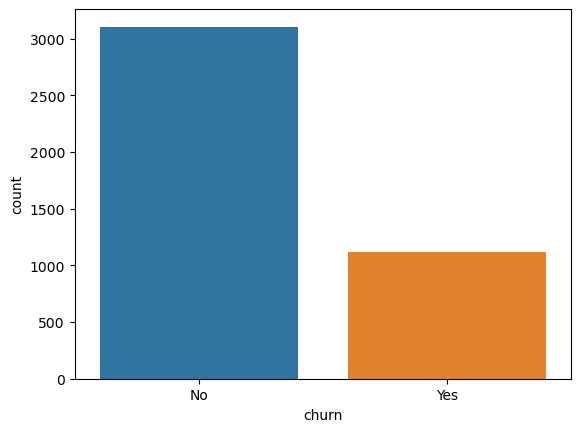

In [19]:
sns.countplot(data=train, x='churn')

breakdown contract to see what's causing churn

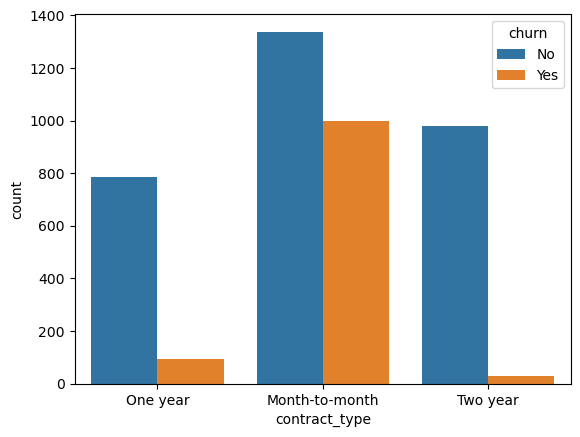

In [21]:
sns.countplot(x="contract_type", hue="churn", data=train);

In [25]:
#month to month contract churn rate
(train[train.contract_type == 'Month-to-month contract_type' ].churn.value_counts(normalize=True))

Series([], Name: proportion, dtype: float64)

Bivariate Stats:


Hypothesize

Visualize

Analyze (with stats)

Summarize

Hypothesize
Q: Does not having online security affect whether or not someone churns?

$H_o$: There is NO relationship between contract and a customer churning.

$H_a$: There is a relationship between contract and a customer churning.

Visualize

Analyze

In [26]:
observed = pd.crosstab(train.churn, train.contract_type)
observed

contract_type,Month-to-month,One year,Two year
churn,,,
No,1338,785,981
Yes,997,94,30


In [27]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [28]:
alpha = 0.5

In [29]:
p

8.298049251133243e-156

my p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude there is a relationship between being a codeup studend and using a macbook.

Q2: Are high monthly charges causing customers to churn?

High monthly charges is defined as being higher than average monthly charged.

$H_o$: There is NO relationship between monthly charges and a customer churning.

$H_a$: There is a relationship between monthly charges and a customer churning.

In [32]:
high_monthly_charges = train.monthly_charges[train.monthly_charges > train.monthly_charges.mean()]

In [33]:
low_monthly_charges = train.monthly_charges[train.monthly_charges < train.monthly_charges.mean()]

In [36]:
#average monthly charge for a customer that churned
train.monthly_charges[train.churn == 'Yes'].mean()

74.499955396967

In [37]:
high_monthly_charges.count()

2353

In [38]:
train [train.churn == 'Yes'].monthly_charges

4107    70.35
3453    19.95
923     86.05
2941    45.10
869     96.80
        ...  
4223    96.15
6642    76.20
416     75.20
1286    70.50
3718    86.55
Name: monthly_charges, Length: 1121, dtype: float64

In [39]:
train.monthly_charges[train.monthly_charges < train.monthly_charges.mean()]

3453    19.95
2370    60.00
713     19.60
2941    45.10
935     19.55
        ...  
4881    48.95
1157    61.40
3362    65.10
4011    49.85
4999    59.60
Name: monthly_charges, Length: 1872, dtype: float64

In [40]:
avg_monthly_charges = train['monthly_charges'].mean()

In [41]:
avg_monthly_charges

65.13894674556212

In [42]:
train.churn[train['monthly_charges'] < avg_monthly_charges ].value_counts(normalize=True)

churn
No     0.837073
Yes    0.162927
Name: proportion, dtype: float64

In [43]:
train.churn[train['monthly_charges'] > avg_monthly_charges ].value_counts(normalize=True)

churn
No     0.653209
Yes    0.346791
Name: proportion, dtype: float64

In [44]:
train.churn[train['monthly_charges'] < avg_monthly_charges ].value_counts()

churn
No     1567
Yes     305
Name: count, dtype: int64

In [45]:
train.churn[train['monthly_charges'] > avg_monthly_charges].value_counts()

churn
No     1537
Yes     816
Name: count, dtype: int64

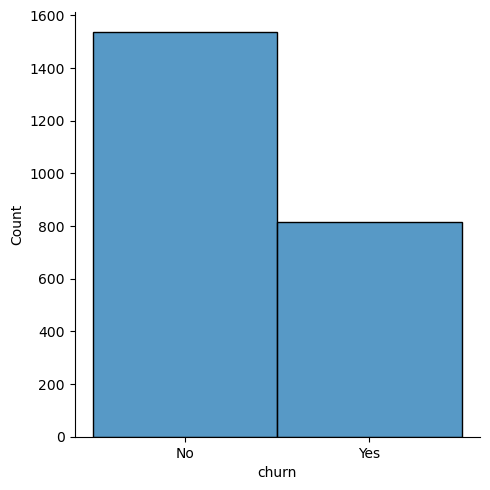

In [69]:
#nearly 35% churn with higher than average monthly payments 
sns.displot(train.churn[train['monthly_charges'] > avg_monthly_charges]);

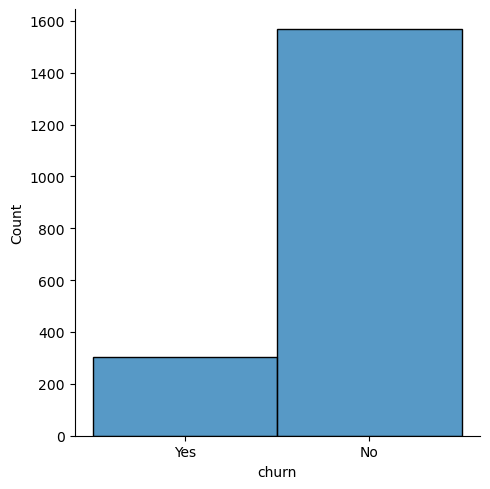

In [68]:
#only 16% churn with lower than average monthly payments 
sns.displot(train.churn[train['monthly_charges'] < avg_monthly_charges ]);

In [52]:
low_charges_churn = train.churn [train['monthly_charges'] < train['monthly_charges'].mean()]

In [53]:
high_charges_churn = train.churn [train.monthly_charges > train.monthly_charges.mean()]

In [54]:
alpha = 0.5

In [55]:
#comparing categorical (churned:True or False) vs continuous variable (monthly charges)
# We will use a one sample ttest comparing monthly charges of customers who churned to monthly 
# charges of all customers.
# in this case represents our population
#So we will use a one sample, two tailed ttest

mc_churn = train [train.churn == 'Yes'].monthly_charges

monthly_charges_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(mc_churn, monthly_charges_mean)

print(t, p, alpha)

12.630413381380539 2.7605654410224826e-34 0.5


In [56]:
if p < alpha:
    print('We can reject our null hypothesis and say that there is a difference in means')
else:
    print('We fail to reject our null hypothesis')

We can reject our null hypothesis and say that there is a difference in means


>My p-value is less than alpha, therefore, we reject the null hypothesis.

>   We can conclude that there is a relationship between monthly charges and churning.

Summarize

We confirmed there is a relationship between monthly charges and churning.

In [57]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No Internet Service,payment_types_Manual
2865,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,No,...,0,0,0,0,1,1,0,1,0,0
4107,Female,1,No,No,2,Yes,No,No,No,No,...,0,0,0,0,0,0,0,1,0,1
3453,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,0,0,1,1
923,Male,0,No,No,10,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,1,0,0
2370,Male,0,No,No,43,Yes,No,No,Yes,No,...,0,0,0,0,1,0,1,0,0,1


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   gender                                     4225 non-null   object 
 1   senior_citizen                             4225 non-null   int64  
 2   partner                                    4225 non-null   object 
 3   dependents                                 4225 non-null   object 
 4   tenure                                     4225 non-null   int64  
 5   phone_service                              4225 non-null   object 
 6   multiple_lines                             4225 non-null   object 
 7   online_security                            4225 non-null   object 
 8   online_backup                              4225 non-null   object 
 9   device_protection                          4225 non-null   object 
 10  tech_support              

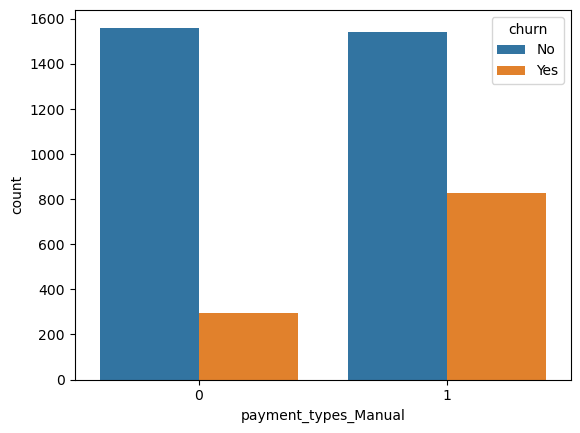

In [106]:
sns.countplot(x="payment_types_Manual", hue="churn", data=train);

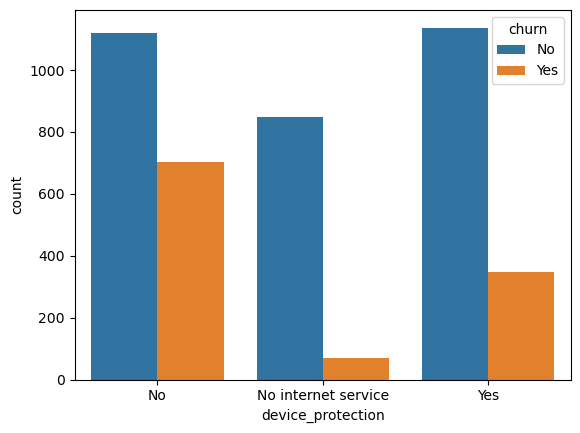

In [89]:
sns.countplot(x="device_protection", hue="churn", data=train);

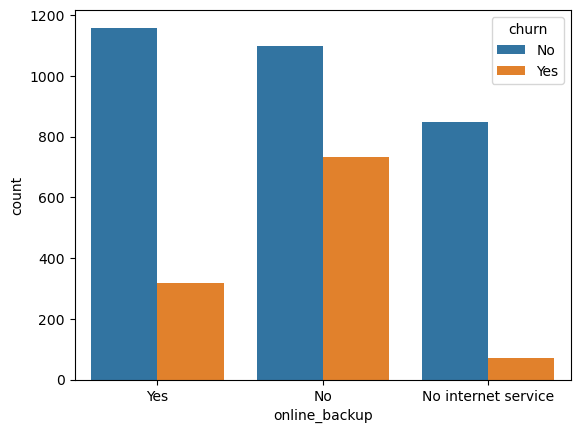

In [88]:
sns.countplot(x="online_backup", hue="churn", data=train);

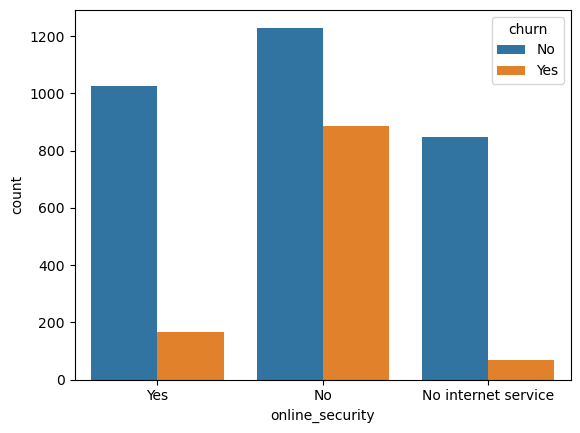

In [87]:
sns.countplot(x="online_security", hue="churn", data=train);

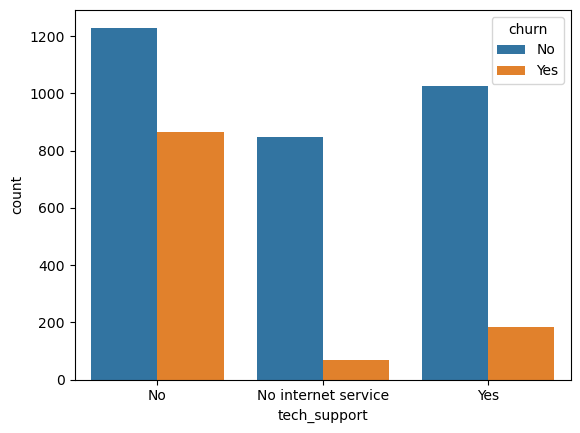

In [86]:
sns.countplot(x="tech_support", hue="churn", data=train);

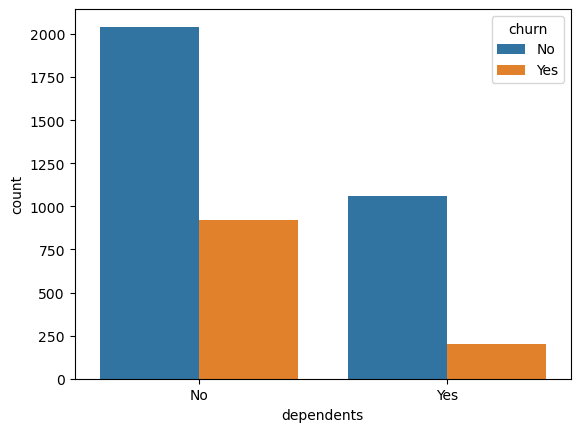

In [84]:
sns.countplot(x="dependents", hue="churn", data=train);

In [85]:
train.dependents.value_counts()

dependents
No     2961
Yes    1264
Name: count, dtype: int64

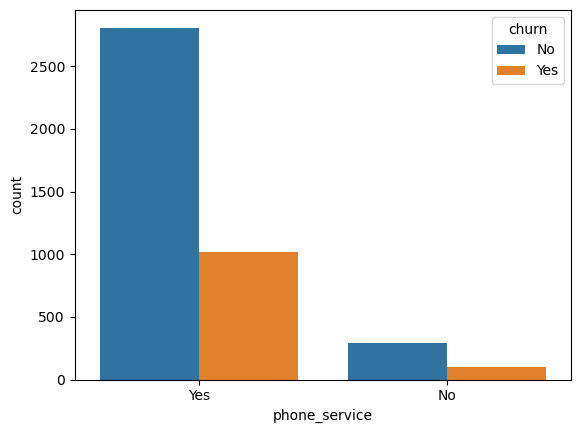

In [83]:
sns.countplot(x="phone_service", hue="churn", data=train);

<Axes: xlabel='internet_service_type', ylabel='count'>

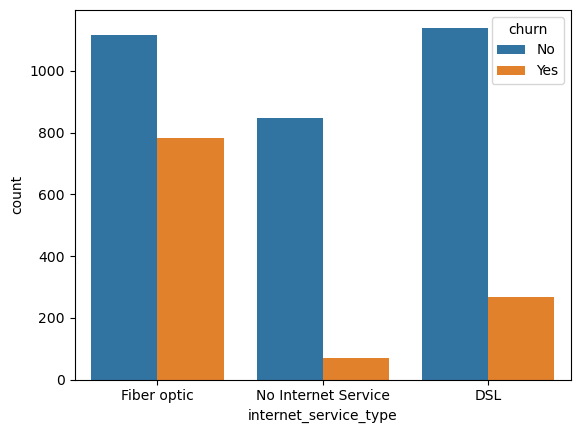

In [82]:
sns.countplot(x="internet_service_type", hue="churn", data=train);

In [81]:
train['internet_service_type_Fiber optic'].value_counts()

internet_service_type_Fiber optic
0    2327
1    1898
Name: count, dtype: int64

In [79]:
train.churn[train['internet_service_type_Fiber optic'] == 0].value_counts(normalize=True)

churn
No     0.854319
Yes    0.145681
Name: proportion, dtype: float64

In [80]:
train.churn[train['internet_service_type_Fiber optic'] == 1].value_counts(normalize=True)

churn
No     0.587987
Yes    0.412013
Name: proportion, dtype: float64

In [90]:
train.churn[train['internet_service_type_Fiber optic'] == 1].value_counts()

churn
No     1116
Yes     782
Name: count, dtype: int64

 Q3: Is a customer having fiber optic internet related to a customer churning?
 
 $H_o$: There is NO association between a customer having fiber optic internet and them churning.
 
 $H_a$: There IS an association between a customer having fiber optic internet and them churning.

In [100]:
alpha=0.5

In [101]:
observed = pd.crosstab(train.churn, train['internet_service_type_Fiber optic'])
observed

internet_service_type_Fiber optic,0,1
churn,,
No,1988,1116
Yes,339,782


In [103]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [104]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1988 1116]
 [ 339  782]]

Expected
[[1709 1394]
 [ 617  503]]

----
chi^2 = 379.0319
p     = 0.0000


In [105]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


There IS an association between a customer having fiber optic internet and them churning.

Q4: Is a customer having manual payments related to a customer churning?
 
$H_o$: There is NO association between a customer having manual payments and them churning.
 
$H_a$: There IS an association between a customer having manual payments and them churning.

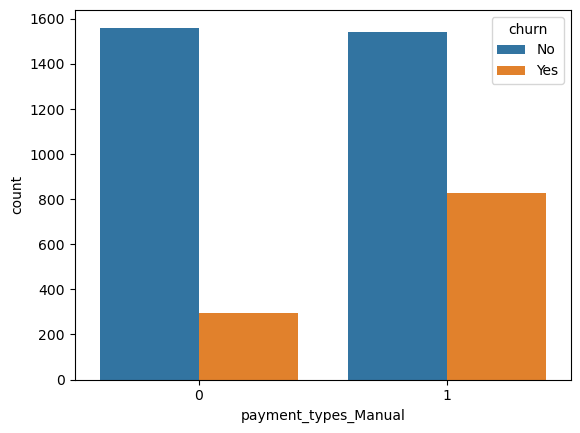

In [107]:
sns.countplot(x="payment_types_Manual", hue="churn", data=train);

In [108]:
train['payment_types_Manual'].value_counts()

payment_types_Manual
1    2369
0    1856
Name: count, dtype: int64

In [109]:
train.churn[train['payment_types_Manual'] == 1].value_counts()

churn
No     1543
Yes     826
Name: count, dtype: int64

In [110]:
train.churn[train['payment_types_Manual'] == 0].value_counts()

churn
No     1561
Yes     295
Name: count, dtype: int64

In [112]:
train.churn[train['payment_types_Manual'] == 1].value_counts(normalize=True)

churn
No     0.65133
Yes    0.34867
Name: proportion, dtype: float64

In [111]:
train.churn[train['payment_types_Manual'] == 0].value_counts(normalize=True)

churn
No     0.841056
Yes    0.158944
Name: proportion, dtype: float64

In [113]:
alpha=0.5

In [114]:
observed = pd.crosstab(train.churn, train['payment_types_Manual'])
observed

payment_types_Manual,0,1
churn,,
No,1561,1543
Yes,295,826


In [115]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [116]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1561 1543]
 [ 295  826]]

Expected
[[1363 1740]
 [ 492  628]]

----
chi^2 = 191.2033
p     = 0.0000


In [117]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


There IS an association between a customer having manual payment types and them churning.

In [ ]:
#need to add only certain columns to X_train...

In [119]:
X_train = train.drop(columns='churn')
X_validate = validate.drop(columns='churn')
X_test = test.drop(columns='churn')

In [120]:
y_train = train.churn
y_validate = validate.churn
y_test = test.churn

In [121]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

In [124]:
train.churn.mode()

0    No
Name: churn, dtype: object

In [125]:
(train.churn == 'No').mean()

0.7346745562130178

>my baseline prediction is 'No' (not churned) and the accuracy is 73%

In [126]:
#creating the object
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [128]:
train.dtypes

gender                                        object
senior_citizen                                 int64
partner                                       object
dependents                                    object
tenure                                         int64
phone_service                                 object
multiple_lines                                object
online_security                               object
online_backup                                 object
device_protection                             object
tech_support                                  object
streaming_tv                                  object
streaming_movies                              object
paperless_billing                             object
monthly_charges                              float64
total_charges                                float64
churn                                         object
contract_type                                 object
internet_service_type                         

In [127]:
#fitting the object

tree.fit(X_train, y_train)

ValueError: could not convert string to float: 'Female'